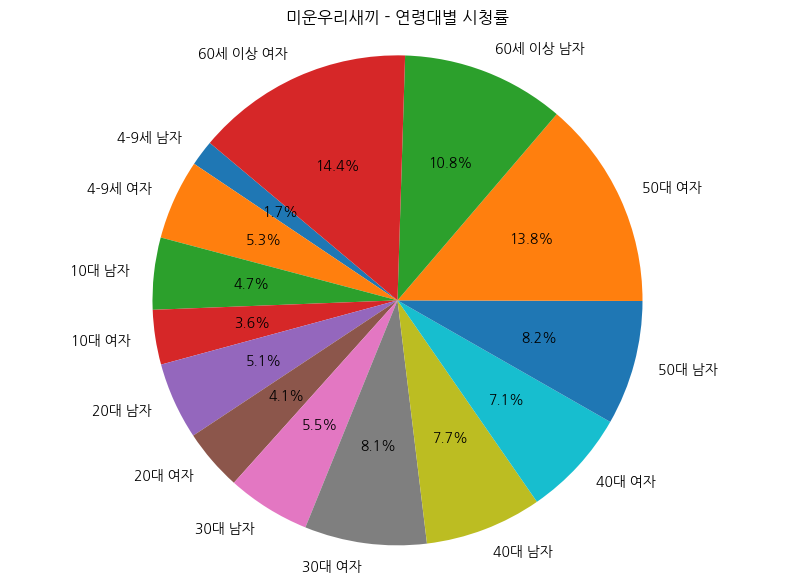

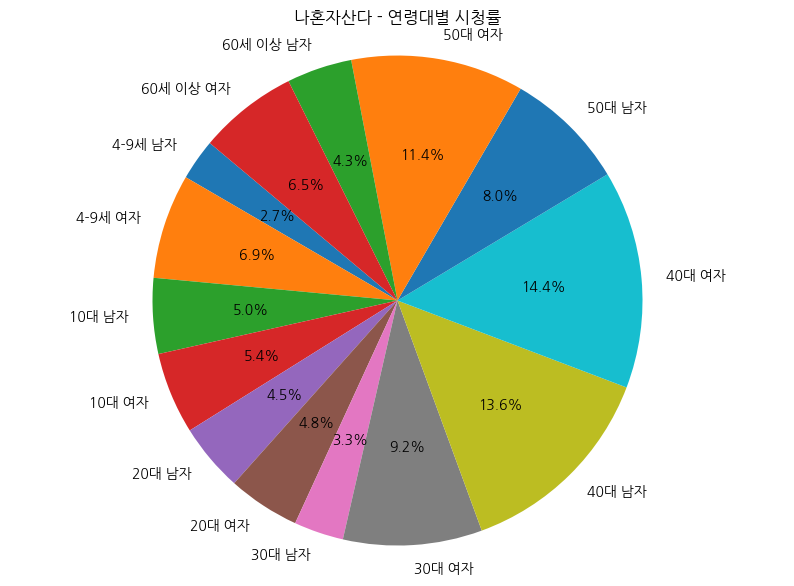

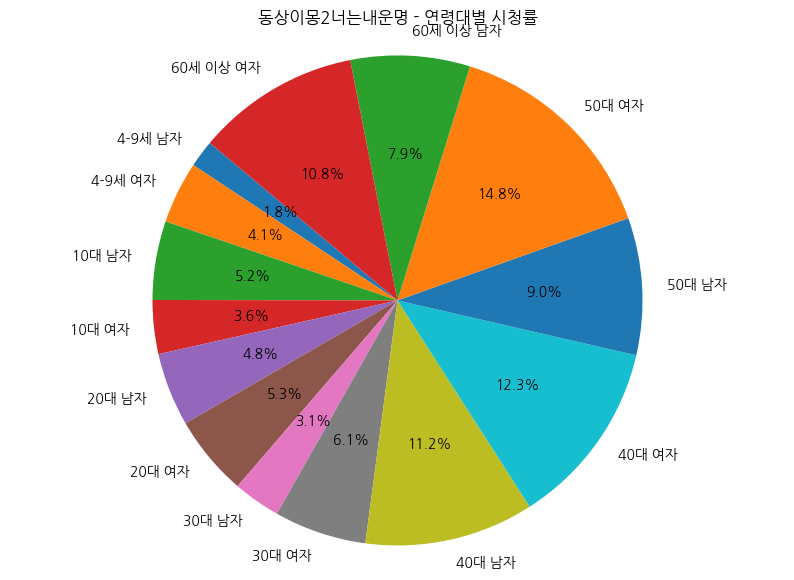

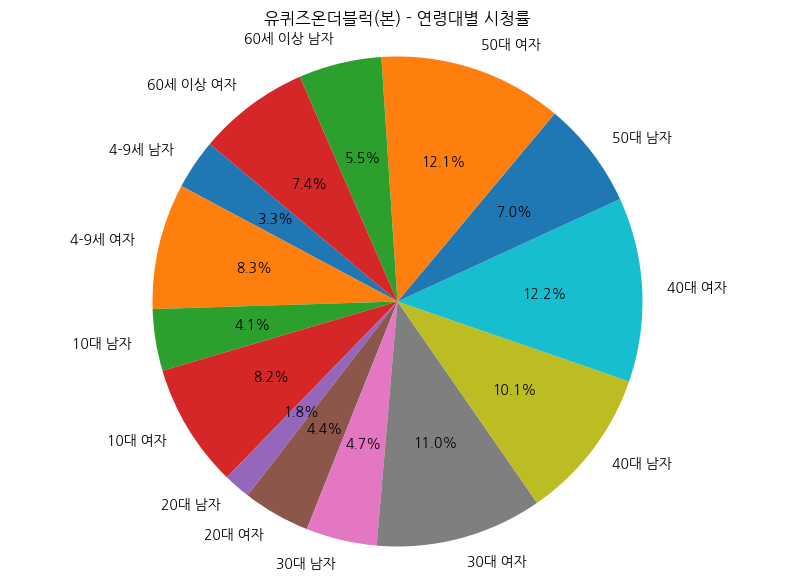

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
df = pd.read_csv('시청주체/유사성 높은 프로그램 연령대별 시청률.csv')

# 프로그램별로 반복합니다.
for index, row in df.iterrows():
    program_name = row['프로그램명']
    
    # 연령대별 시청률 데이터를 딕셔너리로 만듭니다.
    age_groups = [
        '4-9세 남자', '4-9세 여자', '10대 남자', '10대 여자',
        '20대 남자', '20대 여자', '30대 남자', '30대 여자',
        '40대 남자', '40대 여자', '50대 남자', '50대 여자',
        '60세 이상 남자', '60세 이상 여자'
    ]
    
    viewership = [
        row['4-9세 남자_시청률 (%)'], row['4-9세 여자_시청률 (%)'],
        row['10대 남자_시청률 (%)'], row['10대 여자_시청률 (%)'],
        row['20대 남자_시청률 (%)'], row['20대 여자_시청률 (%)'],
        row['30대 남자_시청률 (%)'], row['30대 여자_시청률 (%)'],
        row['40대 남자_시청률 (%)'], row['40대 여자_시청률 (%)'],
        row['50대 남자_시청률 (%)'], row['50대 여자_시청률 (%)'],
        row['60세 이상 남자_시청률 (%)'], row['60세 이상 여자_시청률 (%)']
    ]

    # 파이차트를 그립니다.
    plt.figure(figsize=(10, 7))
    plt.pie(viewership, labels=age_groups, autopct='%1.1f%%', startangle=140)
    plt.title(f'{program_name} - 연령대별 시청률')
    plt.axis('equal')  # 원형으로 보이게 함
    plt.show()


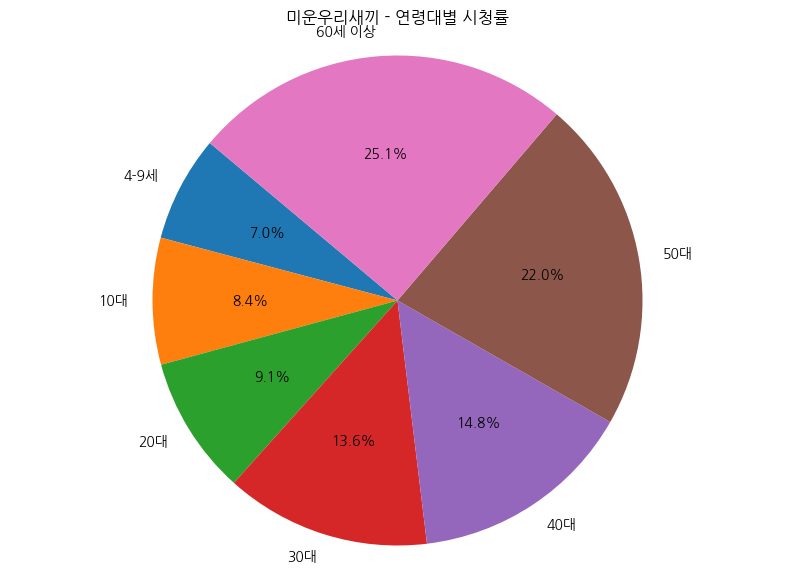

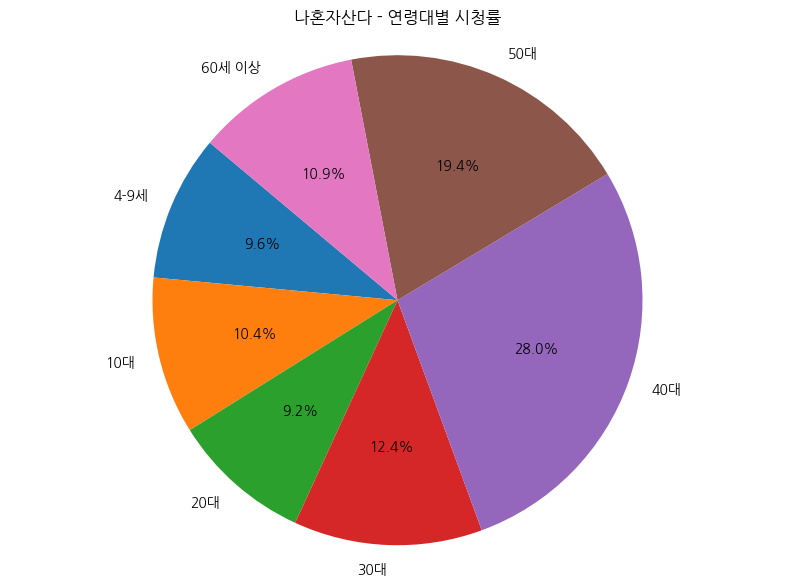

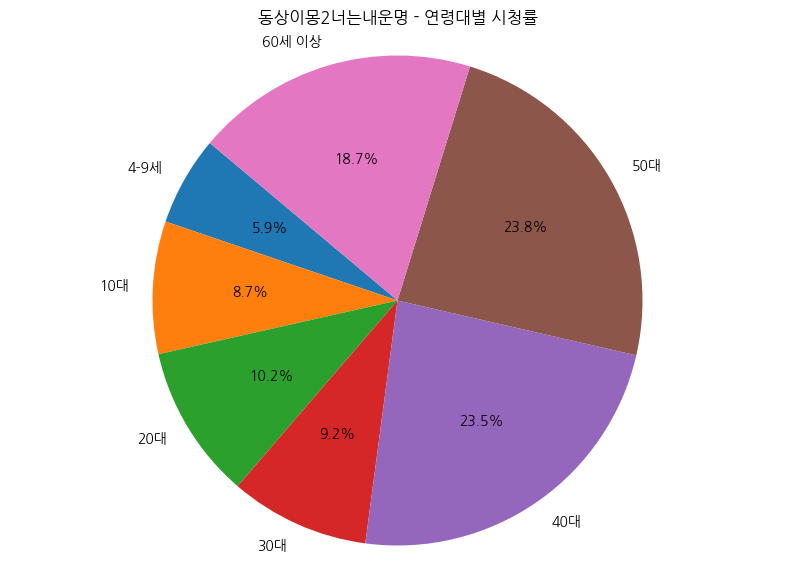

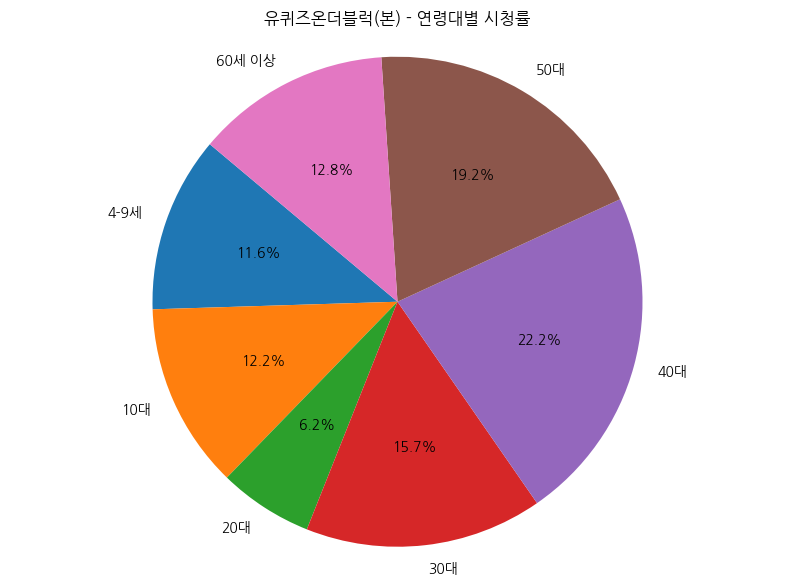

In [3]:
# CSV 파일을 읽어옵니다.
df = pd.read_csv('시청주체/유사성 높은 프로그램 연령대별 시청률.csv')

# 프로그램별로 반복합니다.
for index, row in df.iterrows():
    program_name = row['프로그램명']
    
    # 성별을 합산한 연령대별 시청률 데이터를 딕셔너리로 만듭니다.
    age_groups = [
        '4-9세', '10대', '20대', '30대', '40대', '50대', '60세 이상'
    ]
    
    viewership = [
        row['4-9세 남자_시청률 (%)'] + row['4-9세 여자_시청률 (%)'],
        row['10대 남자_시청률 (%)'] + row['10대 여자_시청률 (%)'],
        row['20대 남자_시청률 (%)'] + row['20대 여자_시청률 (%)'],
        row['30대 남자_시청률 (%)'] + row['30대 여자_시청률 (%)'],
        row['40대 남자_시청률 (%)'] + row['40대 여자_시청률 (%)'],
        row['50대 남자_시청률 (%)'] + row['50대 여자_시청률 (%)'],
        row['60세 이상 남자_시청률 (%)'] + row['60세 이상 여자_시청률 (%)']
    ]

    # 파이차트를 그립니다.
    plt.figure(figsize=(10, 7))
    plt.pie(viewership, labels=age_groups, autopct='%1.1f%%', startangle=140)
    plt.title(f'{program_name} - 연령대별 시청률')
    plt.axis('equal')  # 원형으로 보이게 함
    plt.show()

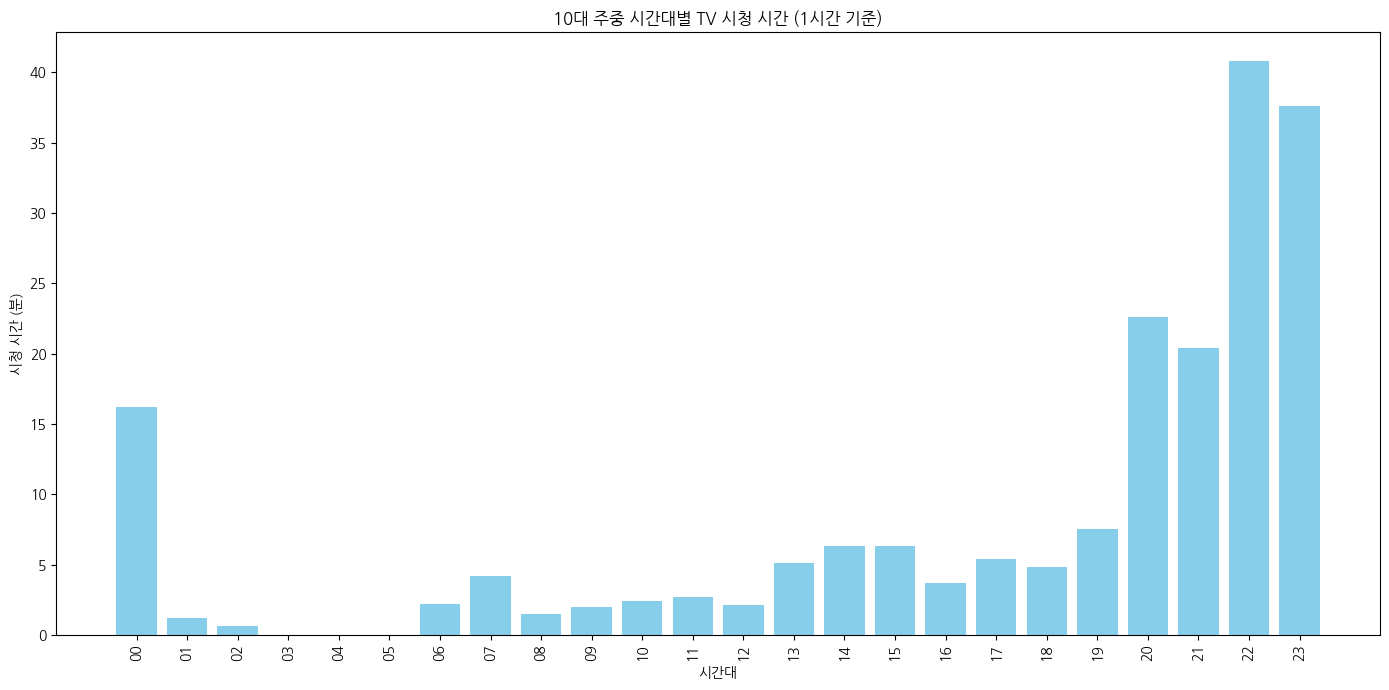

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '시청주체/1020 TV 시청 시간.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 10대 주중 TV 시청 데이터만 선택
teen_weekday_data = df[(df['연령별'] == '10대') & (df['시간대별'] == '주중 ')]

# 필요한 열만 선택 (시간대 열과 시청 시간 열)
time_columns = ['6:00', '6:20', '6:40', '7:00', '7:20', '7:40', '8:00', '8:20', '8:40', '9:00',
                 '9:20', '9:40', '10:00', '10:20', '10:40', '11:00', '11:20', '11:40', '12:00', '12:20',
                 '12:40', '13:00', '13:20', '13:40', '14:00', '14:20', '14:40', '15:00', '15:20', '15:40',
                 '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00', '18:20', '18:40', '19:00',
                 '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40', '22:00', '22:20',
                 '22:40', '23:00', '23:20', '23:40', '0:00', '0:20', '0:40', '1:00', '1:20', '1:40', '2:00',
                 '2:20', '2:40', '3:00', '3:20', '3:40', '4:00', '4:20', '4:40', '5:00', '5:20', '5:40']

# 데이터 필터링
teen_weekday_data = teen_weekday_data[time_columns]

# 시간대별 시청 시간을 합산
total_viewing_times = teen_weekday_data.sum()

# 시간대 문자열을 2자리로 패딩하여 1시간 단위로 변환
# '0:00' ~ '23:40' 포맷을 '00', '01', ..., '23'으로 변환
hourly_viewing_times = total_viewing_times.groupby(total_viewing_times.index.str.split(':').str[0].str.zfill(2)).sum()

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(hourly_viewing_times, columns=['시청 시간'])

# 막대 그래프 시각화
plt.figure(figsize=(14, 7))
plt.bar(result_df.index, result_df['시청 시간'], color='skyblue')
plt.xlabel('시간대')
plt.ylabel('시청 시간 (분)')
plt.title('10대 주중 시간대별 TV 시청 시간 (1시간 기준)')
plt.xticks(rotation=90)  # X축 레이블을 수직으로 표시
plt.tight_layout()

# 그래프 출력
plt.savefig('10대 주중 시간대별 TV 시청 시간 (1시간 기준).png')
plt.show()

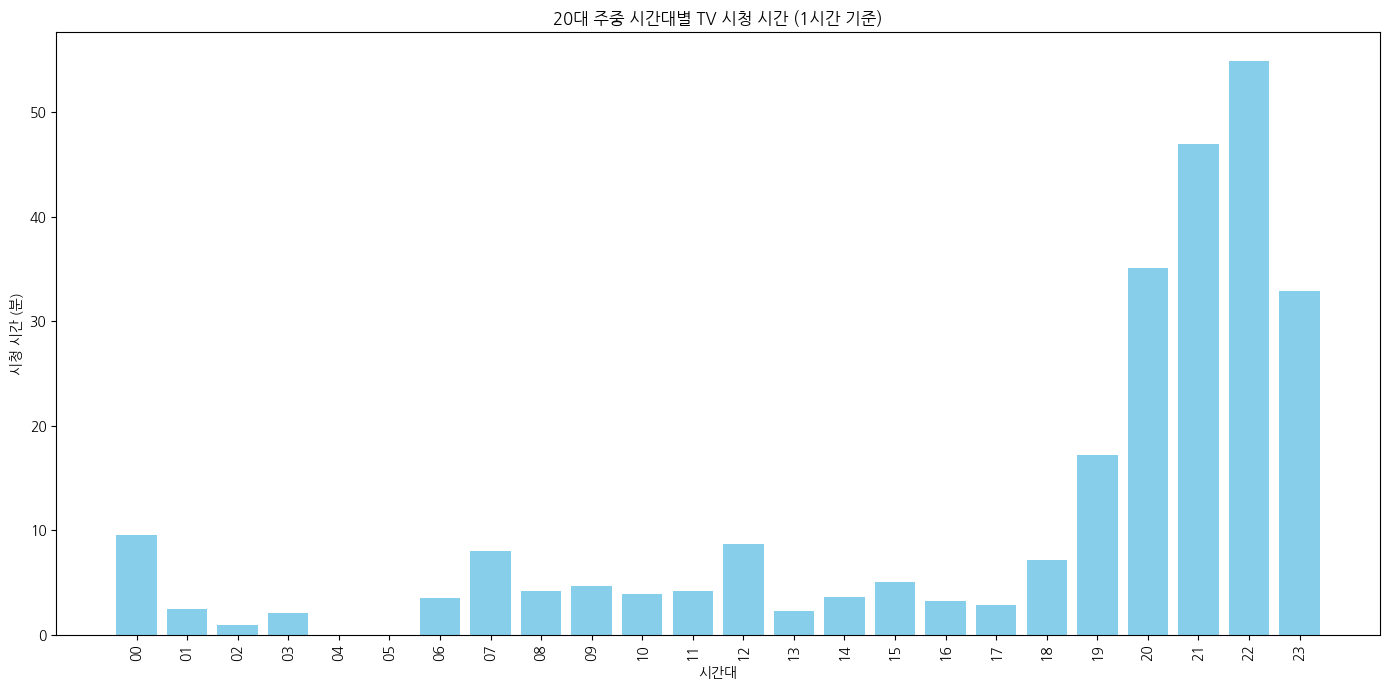

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '시청주체/1020 TV 시청 시간.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 10대 주중 TV 시청 데이터만 선택
teen_weekday_data = df[(df['연령별'] == '20대') & (df['시간대별'] == '주중 ')]

# 필요한 열만 선택 (시간대 열과 시청 시간 열)
time_columns = ['6:00', '6:20', '6:40', '7:00', '7:20', '7:40', '8:00', '8:20', '8:40', '9:00',
                 '9:20', '9:40', '10:00', '10:20', '10:40', '11:00', '11:20', '11:40', '12:00', '12:20',
                 '12:40', '13:00', '13:20', '13:40', '14:00', '14:20', '14:40', '15:00', '15:20', '15:40',
                 '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00', '18:20', '18:40', '19:00',
                 '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40', '22:00', '22:20',
                 '22:40', '23:00', '23:20', '23:40', '0:00', '0:20', '0:40', '1:00', '1:20', '1:40', '2:00',
                 '2:20', '2:40', '3:00', '3:20', '3:40', '4:00', '4:20', '4:40', '5:00', '5:20', '5:40']

# 데이터 필터링
teen_weekday_data = teen_weekday_data[time_columns]

# 시간대별 시청 시간을 합산
total_viewing_times = teen_weekday_data.sum()

# 시간대 문자열을 2자리로 패딩하여 1시간 단위로 변환
# '0:00' ~ '23:40' 포맷을 '00', '01', ..., '23'으로 변환
hourly_viewing_times = total_viewing_times.groupby(total_viewing_times.index.str.split(':').str[0].str.zfill(2)).sum()

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(hourly_viewing_times, columns=['시청 시간'])

# 막대 그래프 시각화
plt.figure(figsize=(14, 7))
plt.bar(result_df.index, result_df['시청 시간'], color='skyblue')
plt.xlabel('시간대')
plt.ylabel('시청 시간 (분)')
plt.title('20대 주중 시간대별 TV 시청 시간 (1시간 기준)')
plt.xticks(rotation=90)  # X축 레이블을 수직으로 표시
plt.tight_layout()

# 그래프 출력
plt.savefig('20대 주중 시간대별 TV 시청 시간 (1시간 기준).png')
plt.show()

In [42]:
# CSV 파일 경로
file_path = '시청주체/1020 TV 시청 시간_주말.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

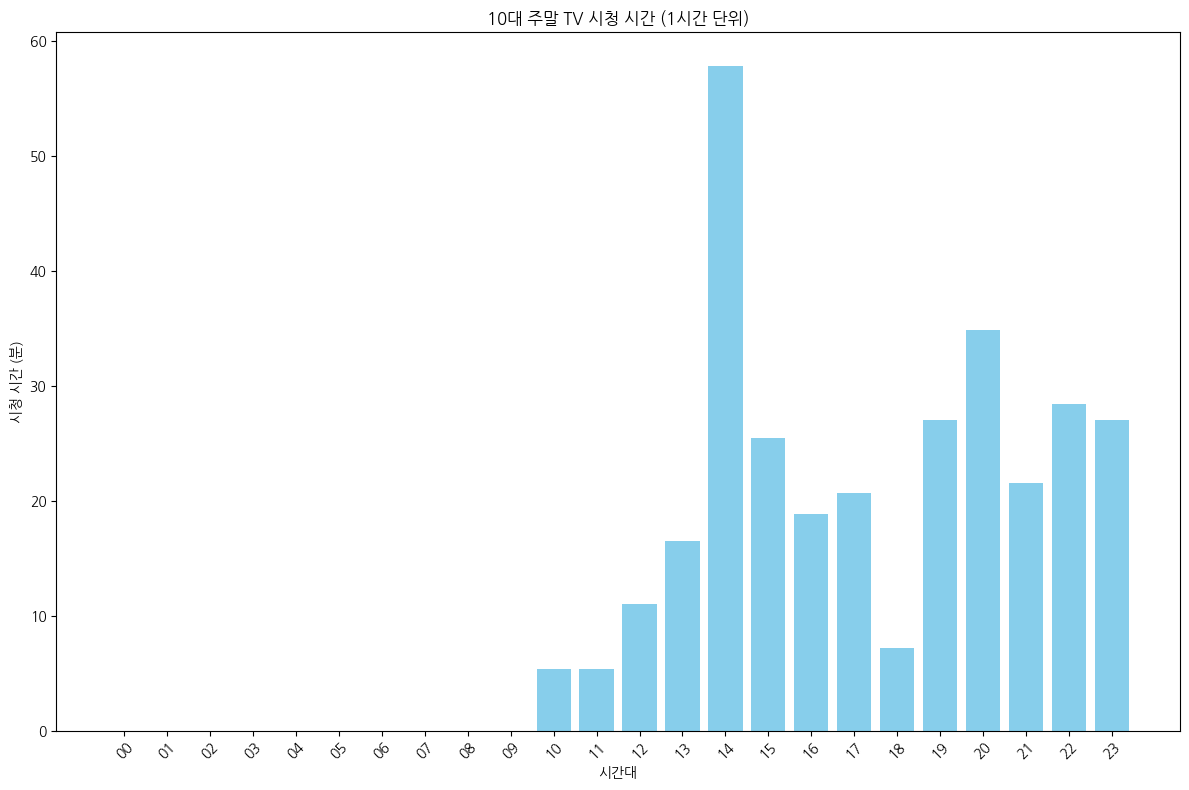

In [56]:
# 10대 주말 데이터 필터링
teen_weekend_data = df[(df['연령별'] == '10대') & (df['시간대별'] == '주말')]

# 필요한 열만 선택 (시간대 열)
time_columns = ['6:00', '6:20', '6:40', '7:00', '7:20', '7:40', '8:00', '8:20', '8:40', '9:00', 
                 '9:20', '9:40', '10:00', '10:20', '10:40', '11:00', '11:20', '11:40', '12:00', 
                 '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20', '14:40', '15:00', 
                 '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00', 
                 '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', 
                 '21:20', '21:40', '22:00', '22:20', '22:40', '23:00', '23:20', '23:40', '0:00', 
                 '0:20', '0:40', '1:00', '1:20', '1:40', '2:00', '2:20', '2:40', '3:00', '3:20', 
                 '3:40', '4:00', '4:20', '4:40', '5:00', '5:20', '5:40']

# 데이터 필터링
teen_weekend_data = teen_weekend_data[time_columns]

# 시간대별 시청 시간을 합산
total_viewing_times = teen_weekend_data.sum()

# 시간대별 데이터를 1시간 단위로 합산
# 시간대 인덱스를 한 시간 단위로 그룹화
hourly_viewing_times = total_viewing_times.groupby(total_viewing_times.index.str[:2] + ':00').sum()

# 시간대 인덱스 정렬 (0:00부터 23:00까지)
hourly_viewing_times = hourly_viewing_times.reindex([f'{i:02d}:00' for i in range(24)], fill_value=0)

# 시간대 인덱스에서 ':00' 제거
hourly_viewing_times.index = hourly_viewing_times.index.str[:2]

# 시각화
plt.figure(figsize=(12, 8))
plt.bar(hourly_viewing_times.index, hourly_viewing_times.values, color='skyblue')
plt.xlabel('시간대')
plt.ylabel('시청 시간 (분)')
plt.title('10대 주말 TV 시청 시간 (1시간 단위)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('10대 주말 시간대별 TV 시청 시간 (1시간 기준).png')
plt.show()

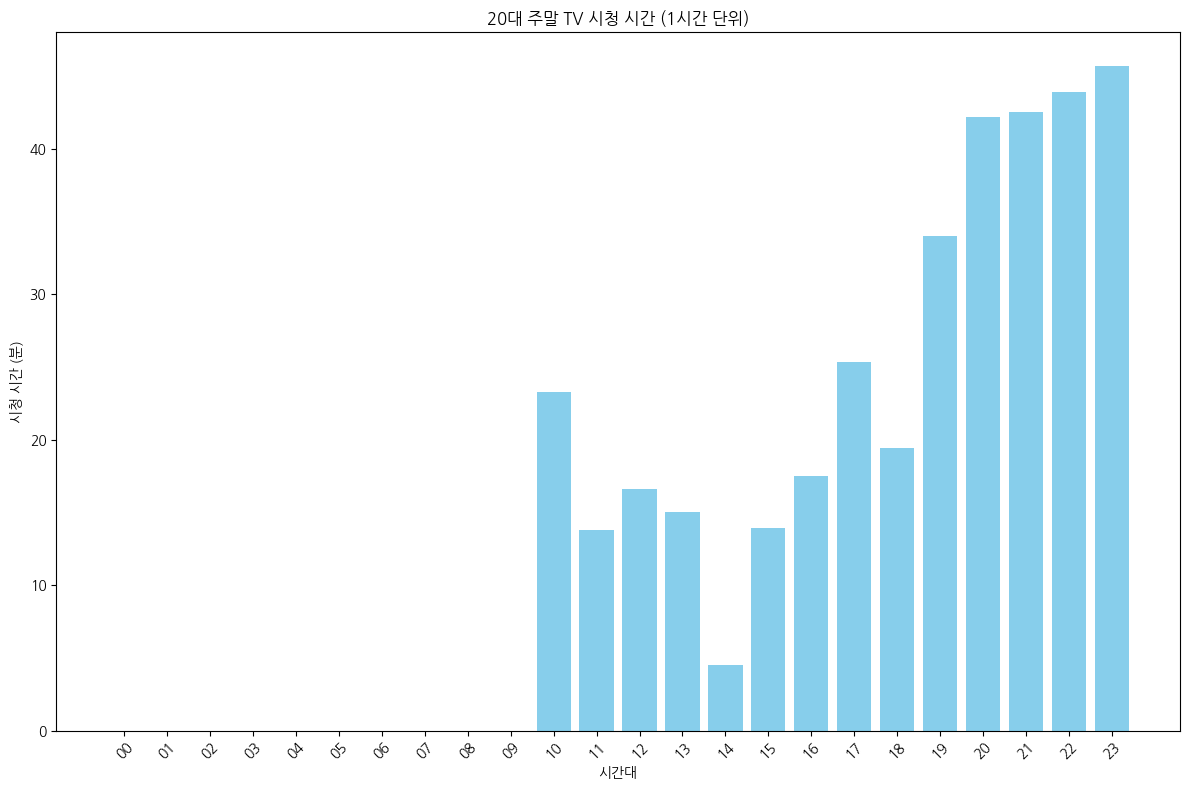

In [57]:
# 10대 주말 데이터 필터링
teen_weekend_data = df[(df['연령별'] == '20대') & (df['시간대별'] == '주말')]

# 필요한 열만 선택 (시간대 열)
time_columns = ['6:00', '6:20', '6:40', '7:00', '7:20', '7:40', '8:00', '8:20', '8:40', '9:00', 
                 '9:20', '9:40', '10:00', '10:20', '10:40', '11:00', '11:20', '11:40', '12:00', 
                 '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20', '14:40', '15:00', 
                 '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00', 
                 '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', 
                 '21:20', '21:40', '22:00', '22:20', '22:40', '23:00', '23:20', '23:40', '0:00', 
                 '0:20', '0:40', '1:00', '1:20', '1:40', '2:00', '2:20', '2:40', '3:00', '3:20', 
                 '3:40', '4:00', '4:20', '4:40', '5:00', '5:20', '5:40']

# 데이터 필터링
teen_weekend_data = teen_weekend_data[time_columns]

# 시간대별 시청 시간을 합산
total_viewing_times = teen_weekend_data.sum()

# 시간대별 데이터를 1시간 단위로 합산
# 시간대 인덱스를 한 시간 단위로 그룹화
hourly_viewing_times = total_viewing_times.groupby(total_viewing_times.index.str[:2] + ':00').sum()

# 시간대 인덱스 정렬 (0:00부터 23:00까지)
hourly_viewing_times = hourly_viewing_times.reindex([f'{i:02d}:00' for i in range(24)], fill_value=0)

# 시간대 인덱스에서 ':00' 제거
hourly_viewing_times.index = hourly_viewing_times.index.str[:2]

# 시각화
plt.figure(figsize=(12, 8))
plt.bar(hourly_viewing_times.index, hourly_viewing_times.values, color='skyblue')
plt.xlabel('시간대')
plt.ylabel('시청 시간 (분)')
plt.title('20대 주말 TV 시청 시간 (1시간 단위)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('20대 주말 시간대별 TV 시청 시간 (1시간 기준).png')
plt.show()

In [11]:
print("열 이름:", df.columns)

열 이름: Index(['365', '성적을부탁해티처스(본)', '오락', '채널A', '1.947 ', '0.541 ', '3.092 ',
       '0.859 ', '0.969 ', '0.269 ', '1.787 ', '0.496 ', '2.292 ', '0.637 ',
       '1.293 ', '0.359 ', '0.171 ', '0.048 ', '0.567 ', '0.157 ', '0.964 ',
       '0.268 ', '0.855 ', '0.237 ', '1.977 ', '0.549 ', '2.456 ', '0.682 ',
       '2.867 ', '0.796 ', '3.397 ', '0.944 ', '2.509 ', '0.697 '],
      dtype='object')


In [17]:
# CSV 파일 경로
file_path = '시청주체/티처스 시청률 - 연령 및 성별.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, header=0)
df.head(5)

,프로그램명,장르,개인 전체,4-9세 남자,4-9세 여자,10대 남자,10대 여자,20대 남자,20대 여자,30대 남자,30대 여자,40대 남자,40대 여자,50대 남자,50대 여자,60세 이상 남자,60세 이상 여자
0,성적을부탁해티처스(본),오락,0.541,0.859,0.269,0.496,0.637,0.359,0.048,0.157,0.268,0.237,0.549,0.682,0.796,0.944,0.697
1,성적을부탁해티처스(재),오락,0.307,0.188,0.088,0.167,0.170,0.160,0.148,0.154,0.144,0.288,0.372,0.299,0.379,0.490,0.505


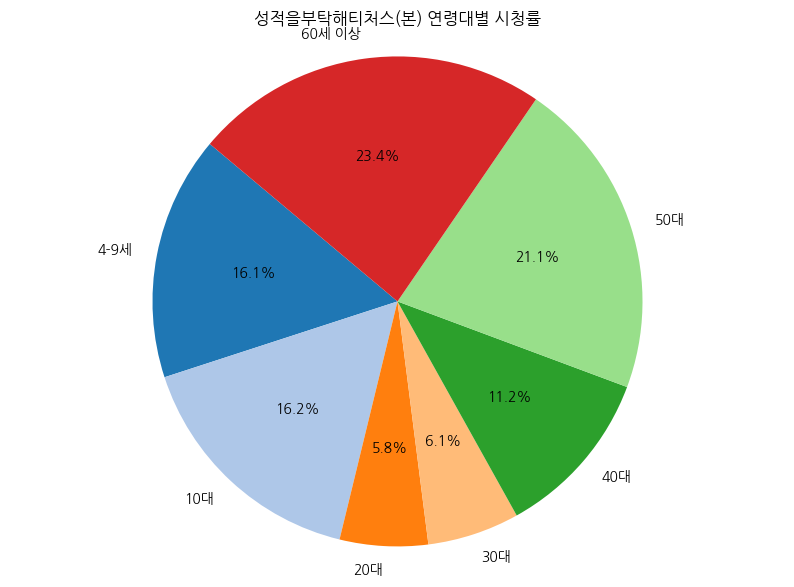

In [58]:
# '성적을부탁해티처스(본)' 데이터만 필터링
data_filtered = data[data['프로그램명'] == '성적을부탁해티처스(본)']

# 필요한 열만 선택
data_filtered = data_filtered[['4-9세 남자', '4-9세 여자', '10대 남자', '10대 여자', '20대 남자', '20대 여자', 
                               '30대 남자', '30대 여자', '40대 남자', '40대 여자', '50대 남자', '50대 여자', 
                               '60세 이상 남자', '60세 이상 여자']]

# 성별 구분 없이 연령대별 시청률 합산
age_groups = {
    '4-9세': data_filtered[['4-9세 남자', '4-9세 여자']].sum(axis=1).values[0],
    '10대': data_filtered[['10대 남자', '10대 여자']].sum(axis=1).values[0],
    '20대': data_filtered[['20대 남자', '20대 여자']].sum(axis=1).values[0],
    '30대': data_filtered[['30대 남자', '30대 여자']].sum(axis=1).values[0],
    '40대': data_filtered[['40대 남자', '40대 여자']].sum(axis=1).values[0],
    '50대': data_filtered[['50대 남자', '50대 여자']].sum(axis=1).values[0],
    '60세 이상': data_filtered[['60세 이상 남자', '60세 이상 여자']].sum(axis=1).values[0]
}

# 파이차트 시각화
plt.figure(figsize=(10, 7))
plt.pie(age_groups.values(), labels=age_groups.keys(), autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('성적을부탁해티처스(본) 연령대별 시청률')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 그래프 출력
plt.savefig('성적을부탁해티처스(본) 연령대별 시청률.png')
plt.show()

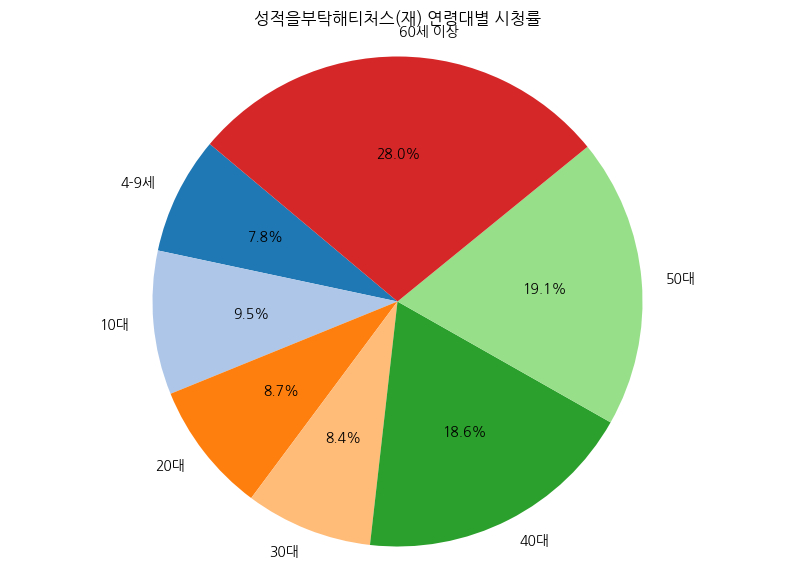

In [22]:
# '성적을부탁해티처스(본)' 데이터만 필터링
data_filtered = data[data['프로그램명'] == '성적을부탁해티처스(재)']

# 필요한 열만 선택
data_filtered = data_filtered[['4-9세 남자', '4-9세 여자', '10대 남자', '10대 여자', '20대 남자', '20대 여자', 
                               '30대 남자', '30대 여자', '40대 남자', '40대 여자', '50대 남자', '50대 여자', 
                               '60세 이상 남자', '60세 이상 여자']]

# 성별 구분 없이 연령대별 시청률 합산
age_groups = {
    '4-9세': data_filtered[['4-9세 남자', '4-9세 여자']].sum(axis=1).values[0],
    '10대': data_filtered[['10대 남자', '10대 여자']].sum(axis=1).values[0],
    '20대': data_filtered[['20대 남자', '20대 여자']].sum(axis=1).values[0],
    '30대': data_filtered[['30대 남자', '30대 여자']].sum(axis=1).values[0],
    '40대': data_filtered[['40대 남자', '40대 여자']].sum(axis=1).values[0],
    '50대': data_filtered[['50대 남자', '50대 여자']].sum(axis=1).values[0],
    '60세 이상': data_filtered[['60세 이상 남자', '60세 이상 여자']].sum(axis=1).values[0]
}

# 파이차트 시각화
plt.figure(figsize=(10, 7))
plt.pie(age_groups.values(), labels=age_groups.keys(), autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('성적을부탁해티처스(재) 연령대별 시청률')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 그래프 출력
plt.show()

TypeError: 'ListedColormap' object is not iterable

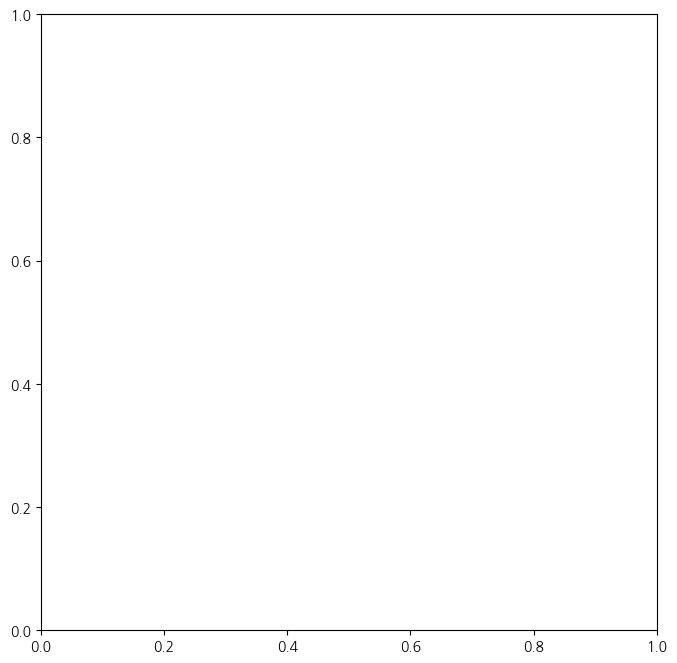

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = '시청주체/티처스 시청률 - 연령 및 성별.csv'

# 데이터 로드
df = pd.read_csv(file_path)

# '성적을부탁해티처스(본)' 데이터만 필터링
df_filtered = df[df['프로그램명'] == '성적을부탁해티처스(본)']

# 필요한 열만 선택 (연령대별 시청률)
age_gender_cols = ['4-9세 남자', '4-9세 여자', '10대 남자', '10대 여자', '20대 남자', '20대 여자', 
                    '30대 남자', '30대 여자', '40대 남자', '40대 여자', '50대 남자', '50대 여자', 
                    '60세 이상 남자', '60세 이상 여자']
viewership_rates = df_filtered[age_gender_cols].values.flatten()

# 연령대별 레이블
labels = age_gender_cols

# 시각화 설정
plt.figure(figsize=(10, 8))

# 파이차트
plt.pie(viewership_rates, labels=labels, autopct='%1.1f%%', colors=plt.get_cmap('tab20', len(labels)), startangle=140)

# 그래프 제목
plt.title('성적을부탁해티처스(본) 연령대별 시청률')

# 그래프 출력
plt.show()